In [1]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scFunctions as sf
import scFates as scf
import palantir
import pickle

# Inital setting for plot size
from matplotlib import rcParams
FIGSIZE=(5,5)
rcParams['figure.figsize']=FIGSIZE

import warnings
warnings.filterwarnings('ignore')

sc.settings.verbosity = 3


%config Completer.use_jedi = False

In [2]:
adata = sc.read_h5ad("../data/MERGED_SEU_REANOTATE_V3.h5ad")
adata

AnnData object with n_obs × n_vars = 120860 × 25572
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'Experiment_ID', 'Stage', 'New_Cell_ID', 'Population', 'Mouse_ID', 'Week_post Cre_activation', 'Sub_class_Stage', 'Mammary_glands', 'mouse_age_(Week)'
    var: 'features'

In [3]:
cells_to_remove = "AV63_GM4G"

adata = adata[adata.obs['orig.ident'] != cells_to_remove, :].copy()
adata

AnnData object with n_obs × n_vars = 119630 × 25572
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'Experiment_ID', 'Stage', 'New_Cell_ID', 'Population', 'Mouse_ID', 'Week_post Cre_activation', 'Sub_class_Stage', 'Mammary_glands', 'mouse_age_(Week)'
    var: 'features'

In [4]:
adata.obs.loc[adata.obs["orig.ident"] == 'AV63_GM4D', "Stage"] = "Early_Stages"
adata.obs.loc[adata.obs["orig.ident"] == 'AV63_GM4D', "Stage"]


45p_GM4D_AAACCCACAGTTGGTT-1    Early_Stages
45p_GM4D_AAACCCATCGTTATCT-1    Early_Stages
45p_GM4D_AAACGAAAGGTTGTTC-1    Early_Stages
45p_GM4D_AAAGAACGTTGCTAGT-1    Early_Stages
45p_GM4D_AAAGGATAGTCGAAGC-1    Early_Stages
                                   ...     
45n_4D_TTTGACTCACATGTTG-1      Early_Stages
45n_4D_TTTGACTGTAGGAGTC-1      Early_Stages
45n_4D_TTTGACTTCACGTAGT-1      Early_Stages
45n_4D_TTTGATCTCGCGTGAC-1      Early_Stages
45n_4D_TTTGTTGAGAGTGGCT-1      Early_Stages
Name: Stage, Length: 1531, dtype: object

In [5]:
adata_tum = adata[adata.obs['orig.ident'] == "AV75", :].raw.to_adata().copy()
adata_tum

AnnData object with n_obs × n_vars = 10683 × 25572
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'Experiment_ID', 'Stage', 'New_Cell_ID', 'Population', 'Mouse_ID', 'Week_post Cre_activation', 'Sub_class_Stage', 'Mammary_glands', 'mouse_age_(Week)'
    var: '_index'

In [6]:
df = pd.read_table("../data/donor_ids.tsv", index_col=0)
df.shape

(1892213, 7)

In [7]:
df.columns

Index(['donor_id', 'prob_max', 'prob_doublet', 'n_vars', 'best_singlet',
       'best_doublet', 'doublet_logLikRatio'],
      dtype='object')

In [8]:
df.head()

,donor_id,prob_max,prob_doublet,n_vars,best_singlet,best_doublet,doublet_logLikRatio
cell,,,,,,,
AAACCCAAGAAACACT-1,unassigned,0.25,0.5,0,donor0,"donor0,donor1",0.0
AAACCCAAGAAACCAT-1,unassigned,0.25,0.5,0,donor0,"donor0,donor1",0.0
AAACCCAAGAAACCCA-1,unassigned,0.25,0.5,0,donor0,"donor0,donor1",0.0
AAACCCAAGAAACCCG-1,unassigned,0.25,0.5,0,donor0,"donor0,donor1",0.0
AAACCCAAGAAACTCA-1,unassigned,0.25,0.5,3,donor0,"donor0,donor1",0.0


In [9]:
cell_name = []

for i in adata_tum.obs.index:
    cell_name.append(i[0:18])

cell_name

['AAACCCAAGCATGCGA-1',
 'AAACCCAAGTGCAGGT-1',
 'AAACCCACAATACAGA-1',
 'AAACCCACAATCAAGA-1',
 'AAACCCACACCGGTCA-1',
 'AAACCCAGTTGATCGT-1',
 'AAACCCATCAATCCAG-1',
 'AAACCCATCTATCGCC-1',
 'AAACCCATCTGTACAG-1',
 'AAACGAAAGCTTCTAG-1',
 'AAACGAAGTATGAGAT-1',
 'AAACGAAGTTCCTAGA-1',
 'AAACGCTAGACGTCCC-1',
 'AAACGCTAGATGTTCC-1',
 'AAACGCTAGCTAATCC-1',
 'AAACGCTAGTCGGCAA-1',
 'AAACGCTCAAGTACCT-1',
 'AAACGCTGTGGAAATT-1',
 'AAACGCTGTTTGGGAG-1',
 'AAACGCTTCCGATGTA-1',
 'AAACGCTTCTTGGAAC-1',
 'AAAGAACAGCATTGAA-1',
 'AAAGAACAGTACCCTA-1',
 'AAAGAACCACGGCTAC-1',
 'AAAGAACGTCCCGGTA-1',
 'AAAGAACGTTCTCCAC-1',
 'AAAGAACTCCATAGGT-1',
 'AAAGGATCAACCGCCA-1',
 'AAAGGATTCCTAGCTC-1',
 'AAAGGGCAGCTGGCCT-1',
 'AAAGGGCAGGTTCATC-1',
 'AAAGGGCCAGAGTGTG-1',
 'AAAGGGCCAGCGCGTT-1',
 'AAAGGGCCATCAACCA-1',
 'AAAGGGCGTGGAGAAA-1',
 'AAAGGGCTCGACACTA-1',
 'AAAGGTAAGTGTTCCA-1',
 'AAAGGTAGTTGGTACT-1',
 'AAAGGTATCGCATAGT-1',
 'AAAGGTATCTCTGCTG-1',
 'AAAGTCCCAAGAGGCT-1',
 'AAAGTCCCAGACTGCC-1',
 'AAAGTGACAAGCGGAT-1',
 'AAAGTGACA

In [10]:
liste = []
j = 0
for i in range(len(cell_name)):
    if cell_name[i] in df.index:
        print(cell_name[i])
        liste.append(df.loc[cell_name[i], "best_singlet"])
    else:
        liste.append("unassigned")
        j += 1

AAACCCAAGCATGCGA-1
AAACCCACAATACAGA-1
AAACCCACAATCAAGA-1
AAACCCATCAATCCAG-1
AAACCCATCTATCGCC-1
AAACCCATCTGTACAG-1
AAACGAAAGCTTCTAG-1
AAACGAAGTATGAGAT-1
AAACGAAGTTCCTAGA-1
AAACGCTAGATGTTCC-1
AAACGCTAGCTAATCC-1
AAACGCTCAAGTACCT-1
AAACGCTGTGGAAATT-1
AAACGCTGTTTGGGAG-1
AAAGAACAGCATTGAA-1
AAAGAACGTCCCGGTA-1
AAAGGATCAACCGCCA-1
AAAGGGCAGCTGGCCT-1
AAAGGGCAGGTTCATC-1
AAAGGGCCAGAGTGTG-1
AAAGGGCCAGCGCGTT-1
AAAGGGCGTGGAGAAA-1
AAAGGTAAGTGTTCCA-1
AAAGGTATCGCATAGT-1
AAAGTCCCAAGAGGCT-1
AAAGTCCCAGACTGCC-1
AAAGTGAGTTTCGTGA-1
AAAGTGATCGAGCACC-1
AAATGGAGTCTGCCTT-1
AAATGGATCGGACTTA-1
AACAAAGCAGCAGTAG-1
AACAAAGTCCCGTTGT-1
AACAAAGTCTTCACAT-1
AACAAGAAGATTACCC-1
AACAAGACACCGCTAG-1
AACACACAGCCGGATA-1
AACACACAGGCTAACG-1
AACACACAGTCGGCAA-1
AACACACCAGCAAGAC-1
AACACACGTGGTCCCA-1
AACAGGGCAACTCCAA-1
AACAGGGCATGTTACG-1
AACAGGGGTACAAGTA-1
AACAGGGGTGTTACAC-1
AACCAACGTGTACAGG-1
AACCAACTCTAAGCGT-1
AACCATGCAGAGTGTG-1
AACCATGGTAGCGCCT-1
AACCATGTCCATCCGT-1
AACCATGTCGAGAACG-1
AACCCAAAGAAACCAT-1
AACCCAAAGTTGCTCA-1
AACCCAAGTTCG

In [11]:
len(cell_name)

10683

In [12]:
j

2751

In [13]:
adata_tum.obs["assignation"] = liste

In [14]:
adata_tum = sf.pp_PCA(adata_tum)

normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:01)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption
computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:02)


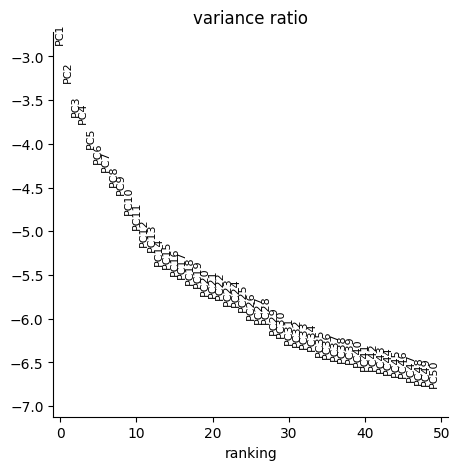

In [15]:
sc.pl.pca_variance_ratio(adata_tum, log=True, n_pcs = 50) #ndim = 30

In [16]:
sc.pp.neighbors(adata_tum, n_pcs=15)
sc.tl.umap(adata_tum)

computing neighbors
    using 'X_pca' with n_pcs = 15
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:18)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:05)


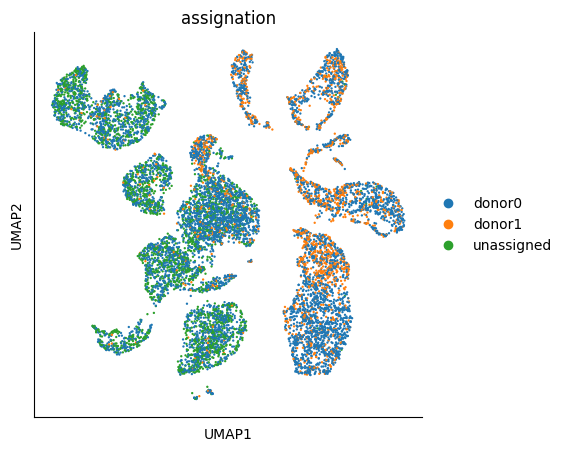

In [17]:
sc.pl.umap(adata_tum, color = 'assignation')

In [18]:
sc.tl.tsne(adata_tum, n_pcs = 10)

computing tSNE
    using 'X_pca' with n_pcs = 10
    using sklearn.manifold.TSNE
    finished: added
    'X_tsne', tSNE coordinates (adata.obsm) (0:01:13)


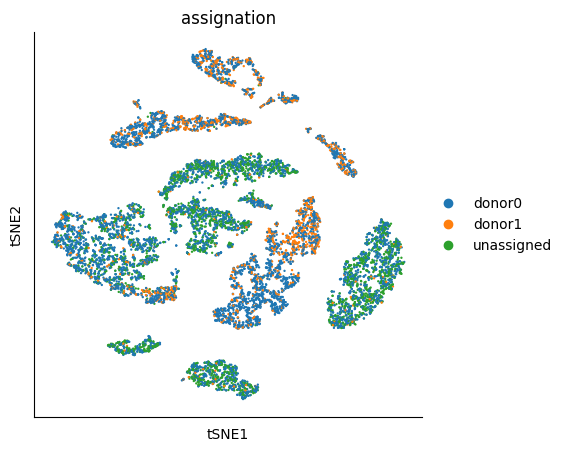

In [19]:
sc.pl.tsne(adata_tum, color = "assignation")

In [20]:
#Load saved adata object
with open('../data/adata_epi.pickle', 'rb') as f1:
     adata_epi = pickle.load(f1)

In [21]:
adata_epi.obs[adata_epi.obs["orig.ident"] == "AV75"].index

Index(['AACGGGAGTTCTTAGG-1_1_15', 'AAGGAATGTCCGAAGA-1_1_15',
       'ACAAGCTAGTTTGAGA-1_1_15', 'ACATGCACACTGAATC-1_1_15',
       'ACCCAAACAAGTCCCG-1_1_15', 'ACCCTTGCAAGGGTCA-1_1_15',
       'ACGGTTAGTTTGGGAG-1_1_15', 'AGTGACTGTAACTTCG-1_1_15',
       'ATACTTCTCTATGCCC-1_1_15', 'ATAGACCGTTGCGGAA-1_1_15',
       ...
       'TTTGACTGTGACCGTC-1_2_15', 'TTTGACTTCCACTAGA-1_2_15',
       'TTTGATCAGAGTTGAT-1_2_15', 'TTTGATCCAAAGAGTT-1_2_15',
       'TTTGATCTCAAATGCC-1_2_15', 'TTTGGAGTCAACTGGT-1_2_15',
       'TTTGGAGTCAGTCAGT-1_2_15', 'TTTGGTTTCACTACGA-1_2_15',
       'TTTGTTGAGGCCTGCT-1_2_15', 'TTTGTTGGTATCACGT-1_2_15'],
      dtype='object', length=2815)

In [22]:
cells_id = adata_epi.obs[adata_epi.obs["orig.ident"] == "AV75"].index

In [41]:
liste = []
n_err = 0
for id in adata_epi.obs.index:
    if id in cells_id:
        if id[:18] in df.index:
            liste.append(df.loc[id[:18], "best_singlet"])
        else:
            liste.append("unassigned")
            n_err += 1
    else:
        liste.append("NA")

In [42]:
n_err

24

In [43]:
len(liste)

9743

In [44]:
adata_epi.obs["assignation"] = liste

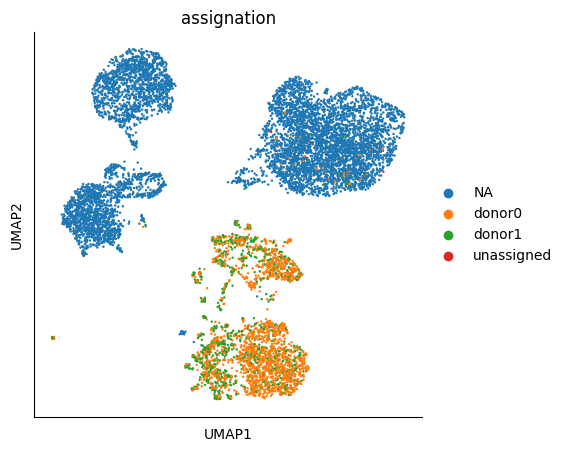

In [45]:
sc.pl.umap(adata_epi, color = "assignation")

<AxesSubplot: xlabel='prob_max', ylabel='Count'>

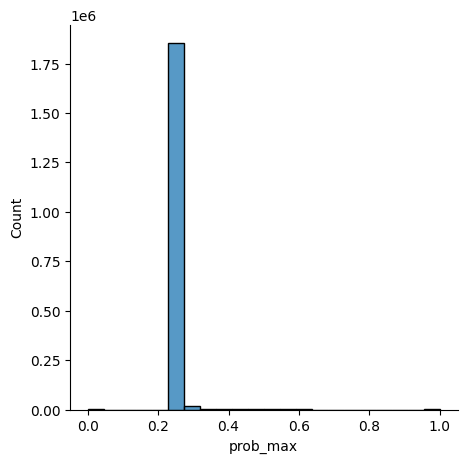

In [26]:
sns.histplot(df.prob_max)

In [27]:
df

,donor_id,prob_max,prob_doublet,n_vars,best_singlet,best_doublet,doublet_logLikRatio
cell,,,,,,,
AAACCCAAGAAACACT-1,unassigned,0.25,0.5,0,donor0,"donor0,donor1",0.0
AAACCCAAGAAACCAT-1,unassigned,0.25,0.5,0,donor0,"donor0,donor1",0.0
AAACCCAAGAAACCCA-1,unassigned,0.25,0.5,0,donor0,"donor0,donor1",0.0
AAACCCAAGAAACCCG-1,unassigned,0.25,0.5,0,donor0,"donor0,donor1",0.0
AAACCCAAGAAACTCA-1,unassigned,0.25,0.5,3,donor0,"donor0,donor1",0.0
...,...,...,...,...,...,...,...
TTTGTTGTCTTTCAGT-1,unassigned,0.25,0.5,0,donor0,"donor0,donor1",0.0
TTTGTTGTCTTTCCGG-1,unassigned,0.25,0.5,0,donor0,"donor0,donor1",0.0
TTTGTTGTCTTTCGAT-1,unassigned,0.25,0.5,0,donor0,"donor0,donor1",0.0


In [28]:
barcodes = pd.read_table("../../souporcell/barcodes_merged/Vn9/barcodes_merged.tsv.gz", sep = ',', header=None)

In [29]:
barcodes

,0
0,AAACCCAAGACGGTCA-1
1,AAACCCAGTAACGCGA-1
2,AAACCCAGTTTCTATC-1
3,AAACGAAAGCCTAGGA-1
4,AAACGCTTCACACCGG-1
...,...
3132,TTTCCTCAGACTTGTC-1
3133,TTTGACTAGCCTATTG-1
3134,TTTGGAGAGTGAGCCA-1
3135,TTTGGTTTCACTACGA-1


In [30]:
test = barcodes[0]

In [31]:
cells_id2 = [i[:18] for i in cells_id]


j = 0
for i in test:
    if i in cells_id2:
        j += 1



print(len(cells_id2))
j

2815


1132

In [32]:
len(np.unique(cells_id2))

2815